In [1]:
# A single neuron with Numpy
import numpy as np

inputs = [ 1.0, 2.0, 3.0, 2.5 ] # Cuatro entradas
weights = [ 0.2, 0.8, -0.5, 1.0 ] # Una neurona tiene tantos pesos como entradas
bias = 2.0 # Un solo bias para la neurona

outputs = np.dot( weights, inputs ) + bias

print( outputs ) # 4.8

4.8


In [2]:
# Una capa de neuronas con Numpy

inputs = [ 1.0, 2.0, 3.0, 2.5 ] # Cuatro entradas
weights = [
    [ 0.2, 0.8, -0.5, 1 ],
    [ 0.5, -0.91, 0.26, -0.5 ],
    [ -0.26, -0.27, 0.17, 0.87 ]
] # Tres neuronas con cuatro pesos cada una
biases = [ 2.0, 3.0, 0.5 ] # Tres biases para las tres neuronas

layer_outputs = np.dot( weights, inputs ) + biases

print( layer_outputs ) # Salida de las tres neuronas

[4.8   1.21  2.385]


In [3]:
# Dos capas de neuronas con Numpy

inputs = [ [ 1.0, 2.0, 3.0, 2.5 ], [ 2.0, 5., -1, 2 ], [-1.5, 2.7, 3.3, -0.8 ] ] # Tres sets de entradas con cuatro valores cada uno
weights = [
    [ 0.2, 0.8, -0.5, 1 ],
    [ 0.5, -0.91, 0.26, -0.5 ],
    [ -0.26, -0.27, 0.17, 0.87 ]
] # Tres neuronas con cuatro pesos cada una
biases = [ 2.0, 3.0, 0.5 ] # Tres biases para las tres neuronas (una por neurona)

weights2 = [
    [0.1, -0.14, 0.5],
    [-0.5, 0.12, -0.33],
    [-0.44, 0.73, -0.13]
] # Tres neuronas con tres pesos cada una (una por neurona) para la segunda capa

biases2 = [ -1, 2, -0.5 ] # Tres biases para las tres neuronas (una por neurona) de la segunda capa

layer1_outputs = np.dot( inputs, np.array(weights).T ) + biases # Salida de la primera capa
layer2_outputs = np.dot( layer1_outputs, np.array(weights2).T ) + biases2 # Salida de la segunda capa

print( layer2_outputs ) # Salida de las tres neuronas de la segunda capa

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


  Using cached nnfs-0.5.1-py3-none-any.whl.metadata (1.7 kB)
Using cached nnfs-0.5.1-py3-none-any.whl (9.1 kB)
Note: you may need to restart the kernel to use updated packages.


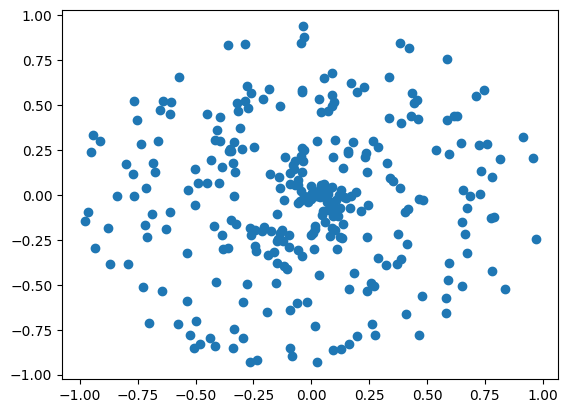

In [5]:
%pip install nnfs

import numpy as np
import nnfs
from nnfs.datasets import spiral_data # Función para generar datos de prueba 

import matplotlib.pyplot as plt

nnfs.init() # Inicializar nnfs 

X, y = spiral_data( samples = 100, classes = 3 ) # Generar 100 muestras de tres clases

plt.scatter( X[:, 0], X[:, 1] ) # Graficar las muestras
plt.show()

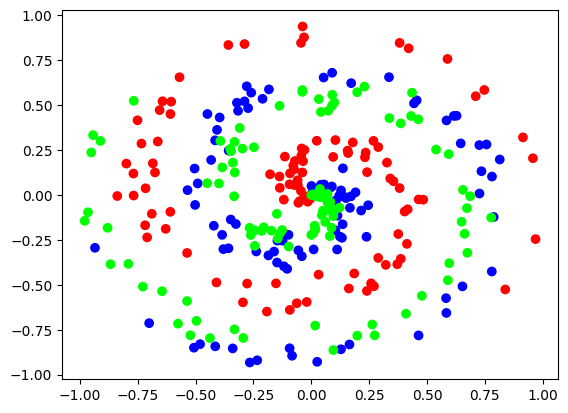

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg') # Graficar las muestras con colores según la clase
plt.show()

In [21]:
# Capas densas con Numpy
import numpy as np
import nnfs
from nnfs.datasets import spiral_data # Función para generar datos de prueba

class Layer_Dense:

  def __init__( self, n_inputs, n_neurons ):
    # Inicializar los pesos y los biases
    self.weights = 0.01 * np.random.randn( n_inputs, n_neurons ) # Inicializar los pesos con valores aleatorios
    self.biases = np.zeros( ( 1, n_neurons ) ) # Inicializar los biases con ceros

  def forward( self, inputs ):
    # Calcular la salida de la capa a partir de los inputs, los pesos y biases
    self.output = np.dot( inputs, self.weights ) + self.biases
    pass

X, y = spiral_data( samples = 100, classes = 3 ) # Generar 100 muestras de tres clases

# Inicializar la capa con dos entradas y tres neuronas
dense1 = Layer_Dense( 2, 3 )

# Realizar el forward pass
dense1.forward( X )

# Imprimir la salida de la capa
print( dense1.output[:5] )

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.00516863e-05  6.83403272e-08 -1.57323797e-04]
 [ 7.76025845e-05 -5.65503651e-05 -2.97237275e-05]
 [ 6.58967547e-05 -6.82533428e-05 -4.74639382e-04]
 [ 1.50479129e-04 -1.04327104e-04  6.07400361e-05]]


### Funciones de activación

#### Función de activación Step

La función de activación Step es una función que toma un valor de entrada y devuelve 1 si el valor de entrada es mayor que un umbral dado, y 0 en caso contrario. La función de activación Step es una función de activación binaria, es decir, solo puede tomar dos valores de salida. La función de activación Step es una función de activación no lineal, ya que la salida no es una función lineal de la entrada.

La formula de la función de activación Step es:

\[
f(x) = \left\{
\begin{array}{ll}
1 & \text{si } x > 0 \\
0 & \text{si } x \leq 0
\end{array}
\right.
\]

In [26]:
# Función de activación Step
import numpy as np
import nnfs
from nnfs.datasets import spiral_data # Función para generar datos de prueba

class Layer_Dense:
  def __init__( self, n_inputs, n_neurons ):
    # Inicializar los pesos y los biases
    self.weights = 0.01 * np.random.randn( n_inputs, n_neurons ) # Inicializar los pesos con valores aleatorios
    self.biases = np.zeros( ( 1, n_neurons ) ) # Inicializar los biases con ceros

  def forward( self, inputs ):
    # Calcular la salida de la capa a partir de los inputs, los pesos y biases
    self.output = np.dot( inputs, self.weights ) + self.biases

class Activation_Step:
  def forward( self, inputs ):
    # Aplicar la función de activación step
    self.output = np.array( inputs > 0, dtype = np.int32 )

X, y = spiral_data( samples = 100, classes = 3 ) # Generar 100 muestras de tres clases

# Inicializar la capa con dos entradas y tres neuronas
dense1 = Layer_Dense( 2, 3 )

# Inicializar la función de activación
activation1 = Activation_Step()

# Realizar el forward pass
dense1.forward( X )

# Imprimir la salida de la capa
print( dense1.output[:5] )
print("")

# Aplicar la función de activación
activation1.forward( dense1.output )

# Imprimir la salida de la función de activación
print( activation1.output[:5] )
print("")

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-5.9543250e-05 -1.2647292e-04  4.3796008e-05]
 [-1.5234436e-04 -2.9160071e-04  1.5504767e-04]
 [-3.1523532e-04 -5.2223087e-04  4.2991369e-04]
 [-4.4760093e-04 -7.1467325e-04  6.4650754e-04]]

[[0 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]]



#### Función de activación Linear

La función de activación Lineal es una función que toma un valor de entrada y devuelve el mismo valor de entrada como salida. La función de activación Lineal es una función de activación lineal, es decir, la salida es una función lineal de la entrada. La función de activación Lineal es una función de activación no lineal, ya que la salida no es una función lineal de la entrada.

La formula de la función de activación Lineal es:

\[
f(x) = x
\]

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.33943595e-05 -1.30807457e-04  1.87612786e-05]
 [ 1.10010433e-05 -1.70284009e-04  1.10918067e-04]
 [ 1.77665788e-05 -2.64080911e-04  1.62527722e-04]
 [-8.24544986e-06 -1.11931884e-04  2.80916371e-04]]

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.33943595e-05 -1.30807457e-04  1.87612786e-05]
 [ 1.10010433e-05 -1.70284009e-04  1.10918067e-04]
 [ 1.77665788e-05 -2.64080911e-04  1.62527722e-04]
 [-8.24544986e-06 -1.11931884e-04  2.80916371e-04]]



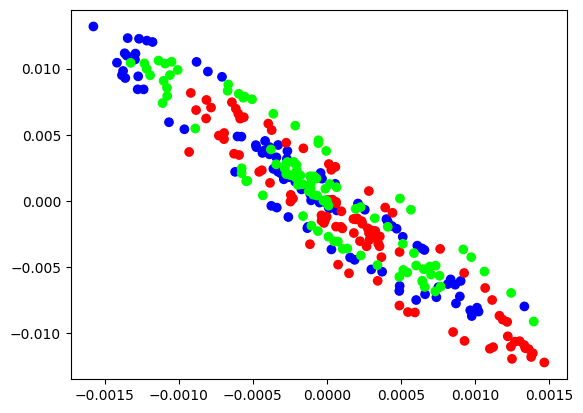

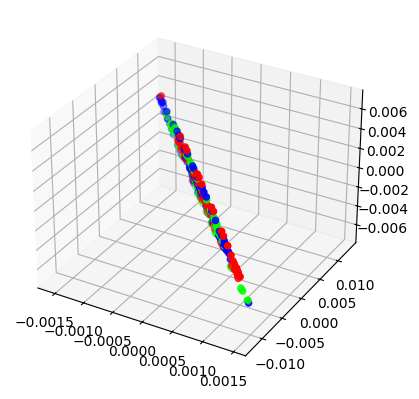

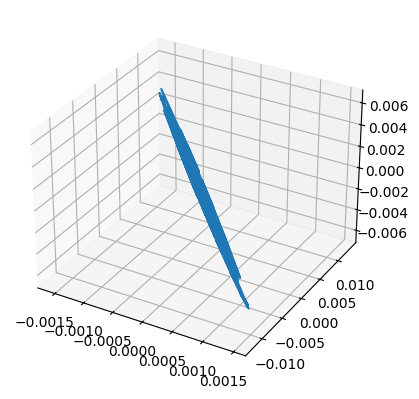

In [32]:
# Función de activación Linear 
import numpy as np
import nnfs
from nnfs.datasets import spiral_data # Función para generar datos de prueba
import matplotlib.pyplot as plt

class Layer_Dense:
  def __init__( self, n_inputs, n_neurons ):
    # Inicializar los pesos y los biases
    self.weights = 0.01 * np.random.randn( n_inputs, n_neurons ) # Inicializar los pesos con valores aleatorios
    self.biases = np.zeros( ( 1, n_neurons ) ) # Inicializar los biases con ceros

  def forward( self, inputs ):
    # Calcular la salida de la capa a partir de los inputs, los pesos y biases
    self.output = np.dot( inputs, self.weights ) + self.biases

class Activation_Linear:
  def forward( self, inputs ):
    # Aplicar la función de activación linear
    self.output = inputs

X, y = spiral_data( samples = 100, classes = 3 ) # Generar 100 muestras de tres clases

# Inicializar la capa con dos entradas y tres neuronas
dense1 = Layer_Dense( 2, 3 )

# Inicializar la función de activación
activation1 = Activation_Linear()

# Realizar el forward pass
dense1.forward( X )

# Imprimir la salida de la capa
print( dense1.output[:5] )
print("")

# Aplicar la función de activación
activation1.forward( dense1.output )

# Imprimir la salida de la función de activación
print( activation1.output[:5] )
print("")

# Graficar la salida de la capa con la función de activación linear
plt.scatter( activation1.output[:, 0], activation1.output[:, 1], c=y, cmap='brg' ) # Graficar las muestras con colores según la clase
plt.show()

# Graficar la salida de la capa y la función de activación linear en 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter( activation1.output[:, 0], activation1.output[:, 1], activation1.output[:, 2], c=y, cmap='brg' ) # Graficar las muestras con colores según la clase
plt.show()

# Graficar la salida de la capa y la función de activación linear en lineas
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot( activation1.output[:, 0], activation1.output[:, 1], activation1.output[:, 2] ) # Graficar las muestras con colores según la clase
plt.show()

#### Función de activación Sigmoid

La función de activación Sigmoid es una función que toma un valor de entrada y devuelve un valor entre 0 y 1 como salida. La función de activación Sigmoid es una función de activación sigmoidea, es decir, la salida es una función sigmoidea de la entrada. La función de activación Sigmoid es una función de activación no lineal, ya que la salida no es una función lineal de la entrada.

La formula de la función de activación Sigmoid es la siguiente:

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 1.2481428e-04  1.7840523e-04 -4.8188791e-05]
 [ 1.6033124e-04  3.5367513e-04 -1.5134276e-04]
 [ 2.7259262e-04  5.5166718e-04 -2.2164578e-04]
 [-5.8829215e-07  3.6359669e-04 -2.6158002e-04]]

[[0.5        0.5        0.5       ]
 [0.50003123 0.5000446  0.49998796]
 [0.5000401  0.5000884  0.4999622 ]
 [0.5000681  0.5001379  0.49994457]
 [0.49999982 0.5000909  0.49993455]]



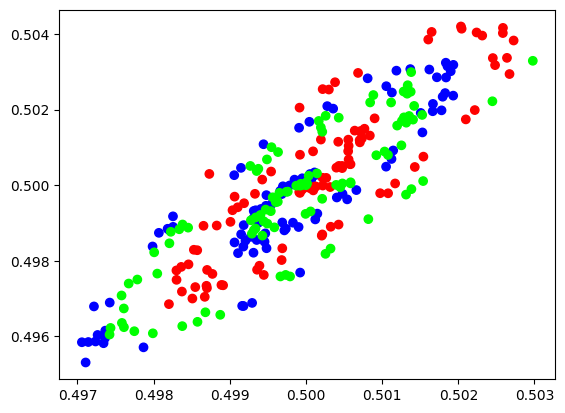

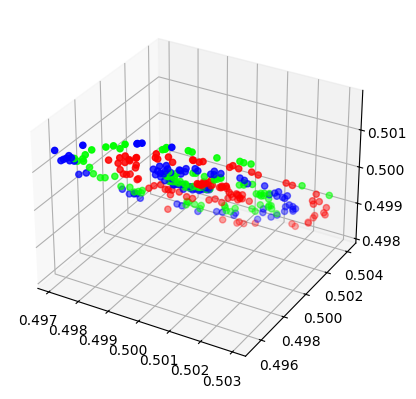

In [33]:
# Función de activación Sigmoide
import numpy as np
import nnfs
from nnfs.datasets import spiral_data # Función para generar datos de prueba
import matplotlib.pyplot as plt

class Layer_Dense:
  def __init__( self, n_inputs, n_neurons ):
    # Inicializar los pesos y los biases
    self.weights = 0.01 * np.random.randn( n_inputs, n_neurons ) # Inicializar los pesos con valores aleatorios
    self.biases = np.zeros( ( 1, n_neurons ) ) # Inicializar los biases con ceros

  def forward( self, inputs ):
    # Calcular la salida de la capa a partir de los inputs, los pesos y biases
    self.output = np.dot( inputs, self.weights ) + self.biases

class Activation_Sigmoid:
  def forward( self, inputs ):
    # Aplicar la función de activación sigmoide
    self.output = 1 / ( 1 + np.exp( -inputs ) )

X, y = spiral_data( samples = 100, classes = 3 ) # Generar 100 muestras de tres clases

# Inicializar la capa con dos entradas y tres neuronas
dense1 = Layer_Dense( 2, 3 )

# Inicializar la función de activación
activation1 = Activation_Sigmoid()

# Realizar el forward pass
dense1.forward( X )

# Imprimir la salida de la capa
print( dense1.output[:5] )
print("")

# Aplicar la función de activación
activation1.forward( dense1.output )

# Imprimir la salida de la función de activación
print( activation1.output[:5] )
print("")

# Graficar la salida de la capa con la función de activación sigmoide
plt.scatter( activation1.output[:, 0], activation1.output[:, 1], c=y, cmap='brg' ) # Graficar las muestras con colores según la clase
plt.show()

# Graficar la salida de la capa y la función de activación sigmoide en 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter( activation1.output[:, 0], activation1.output[:, 1], activation1.output[:, 2], c=y, cmap='brg' ) # Graficar las muestras con colores según la clase
plt.show()

#### Función de activación ReLU

La función de activación ReLU es una función de activación muy popular en la actualidad, ya que es muy eficiente en términos computacionales y ha demostrado ser muy efectiva en la práctica. Toma el valor de entrada y lo pasa a través de una función de activación no lineal, que es la función de activación ReLU. ReLU funciona de la siguiente manera - si el valor de entrada es positivo, la salida es el mismo valor de entrada, y si el valor de entrada es negativo o igual a cero, la salida es 0.

La formula de la función de activación ReLU es la siguiente:

\[
f(x) = \left\{
\begin{array}{ll}
x & \text{si } x > 0 \\
0 & \text{si } x \leq 0
\end{array}
\right.
\]


[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-4.3743705e-05  2.2747095e-05  9.1582378e-06]
 [-9.3062044e-05  4.9351707e-05  1.5928668e-05]
 [ 7.0812865e-05 -6.8259716e-05  1.0174739e-04]
 [ 1.7292022e-04 -1.4251113e-04  1.5881623e-04]]

[[0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 2.2747095e-05 9.1582378e-06]
 [0.0000000e+00 4.9351707e-05 1.5928668e-05]
 [7.0812865e-05 0.0000000e+00 1.0174739e-04]
 [1.7292022e-04 0.0000000e+00 1.5881623e-04]]



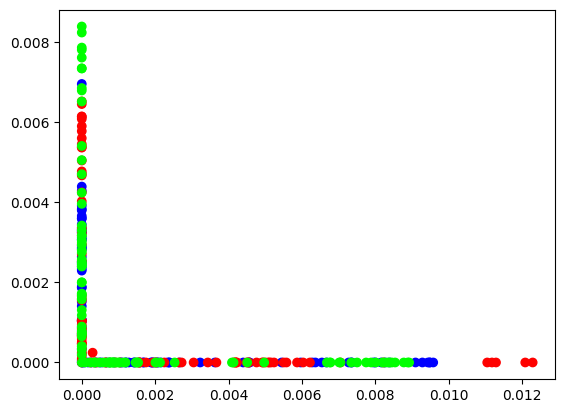

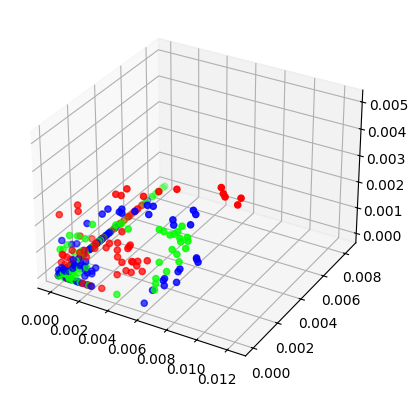

In [49]:
# Función de activación ReLU
import numpy as np
import nnfs
from nnfs.datasets import spiral_data # Función para generar datos de prueba
import matplotlib.pyplot as plt

class Layer_Dense:
  def __init__( self, n_inputs, n_neurons ):
    # Inicializar los pesos y los biases
    self.weights = 0.01 * np.random.randn( n_inputs, n_neurons ) # Inicializar los pesos con valores aleatorios
    self.biases = np.zeros( ( 1, n_neurons ) ) # Inicializar los biases con ceros

  def forward( self, inputs ):
    # Calcular la salida de la capa a partir de los inputs, los pesos y biases
    self.output = np.dot( inputs, self.weights ) + self.biases

class Activation_ReLU:
  def forward( self, inputs ):
    # Aplicar la función de activación ReLU
    self.output = np.maximum( 0, inputs )

X, y = spiral_data( samples = 100, classes = 3 ) # Generar 100 muestras de tres clases

# Inicializar la capa con dos entradas y tres neuronas
dense1 = Layer_Dense( 2, 3 )

# Inicializar la función de activación
activation1 = Activation_ReLU()

# Realizar el forward pass
dense1.forward( X )

# Imprimir la salida de la capa
print( dense1.output[:5] )
print("")

# Aplicar la función de activación
activation1.forward( dense1.output )

# Imprimir la salida de la función de activación
print( activation1.output[:5] )
print("")

# Graficar la salida de la capa con la función de activación ReLU
plt.scatter( activation1.output[:, 0], activation1.output[:, 1], c=y, cmap='brg' ) # Graficar las muestras con colores según la clase
plt.show()

# Graficar la salida de la capa y la función de activación ReLU en 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter( activation1.output[:, 0], activation1.output[:, 1], activation1.output[:, 2], c=y, cmap='brg' ) # Graficar las muestras con colores según la clase
plt.show()


#### Linear activation in the Hidden Layers

Las funciones de activación en capas ocultas son importantes para introducir no linealidades en la red neuronal. Si no se utilizan funciones de activación no lineales en las capas ocultas, la red neuronal se reduce a una función lineal, ya que la composición de dos funciones lineales es una función lineal.

Por lo tanto, es importante utilizar funciones de activación no lineales en las capas ocultas de una red neuronal para que la red pueda aprender funciones no lineales.

#### Función de activación Softmax

La función de activación Softmax es una función que toma un vector de valores de entrada y devuelve un vector de valores de salida que representan la probabilidad de que cada valor de entrada pertenezca a una clase determinada. La función de activación Softmax es una función de activación sigmoidea, es decir, la salida es una función sigmoidea de la entrada. La función de activación Softmax es una función de activación no lineal, ya que la salida no es una función lineal de la entrada.

La formula de la función de activación Softmax es la siguiente:

$$\sigma(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}}$$

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.0475188e-04  1.1395361e-04 -4.7983500e-05]
 [-2.7414842e-04  3.1729150e-04 -8.6921798e-05]
 [-4.2188365e-04  5.2666257e-04 -5.5912682e-05]
 [-5.7707680e-04  7.1401405e-04 -8.9430439e-05]]

[[0.33333334 0.33333334 0.33333334]
 [0.3333027  0.33337563 0.3333216 ]
 [0.3332468  0.33344397 0.33330923]
 [0.33318728 0.33350345 0.33330926]
 [0.33313572 0.3335661  0.3332982 ]]



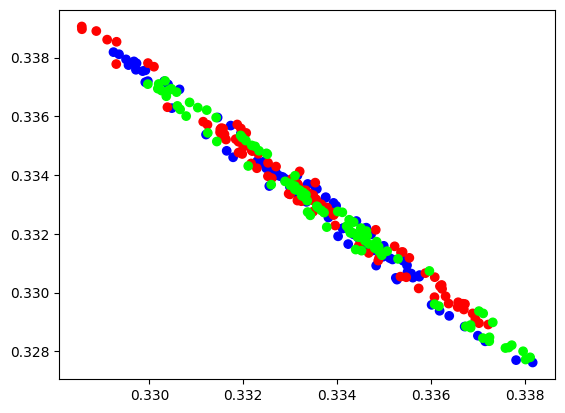

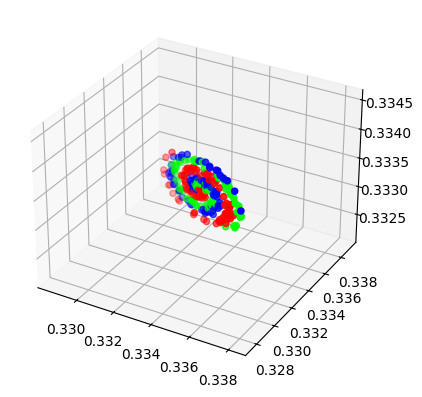

In [86]:
# Función de activación Softmax
import numpy as np
import nnfs
from nnfs.datasets import spiral_data # Función para generar datos de prueba

nnfs.init() # Inicializar nnfs

class Layer_Dense:
  def __init__( self, n_inputs, n_neurons ):
    # Inicializar los pesos y los biases
    self.weights = 0.01 * np.random.randn( n_inputs, n_neurons ) # Inicializar los pesos con valores aleatorios
    self.biases = np.zeros( ( 1, n_neurons ) ) # Inicializar los biases con ceros

  def forward( self, inputs ):
    # Calcular la salida de la capa a partir de los inputs, los pesos y biases
    self.output = np.dot( inputs, self.weights ) + self.biases

class Activation_Softmax:
  def forward( self, inputs ):
    # Aplicar la función de activación Softmax
    exp_values = np.exp( inputs - np.max( inputs, axis = 1, keepdims = True ) )
    probabilities = exp_values / np.sum( exp_values, axis = 1, keepdims = True )
    self.output = probabilities

X, y = spiral_data( samples = 100, classes = 3 ) # Generar 100 muestras de tres clases

# Inicializar la capa con dos entradas y tres neuronas
dense1 = Layer_Dense( 2, 3 )

# Inicializar la función de activación
activation1 = Activation_Softmax()

# Realizar el forward pass
dense1.forward( X )

# Imprimir la salida de la capa
print( dense1.output[:5] )
print("")

# Aplicar la función de activación
activation1.forward( dense1.output )

# Imprimir la salida de la función de activación
print( activation1.output[:5] )
print("")

# Graficar la salida de la capa con la función de activación Softmax
plt.scatter( activation1.output[:, 0], activation1.output[:, 1], c=y, cmap='brg' ) # Graficar las muestras con colores según la clase
plt.show()

# Graficar la salida de la capa y la función de activación Softmax en 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter( activation1.output[:, 0], activation1.output[:, 1], activation1.output[:, 2], c=y, cmap='brg' ) # Graficar las muestras con colores según la clase
plt.show()

In [101]:
# Función de Activación ReLU y Softmax
import numpy as np
import nnfs
from nnfs.datasets import spiral_data # Función para generar datos de prueba

#nnfs.init() # Inicializar nnfs

# Capa densa
class Layer_Dense:
  def __init__( self, n_inputs, n_neurons ):
    # Inicializar los pesos y los biases
    self.weights = 0.01 * np.random.randn( n_inputs, n_neurons ) # Inicializar los pesos con valores aleatorios
    self.biases = np.zeros( ( 1, n_neurons ) ) # Inicializar los biases con ceros

  def forward( self, inputs ):
    # Calcular la salida de la capa a partir de los inputs, los pesos y biases
    self.output = np.dot( inputs, self.weights ) + self.biases

# Función de activación ReLU
class Activation_ReLU:
  def forward( self, inputs ):
    # Aplicar la función de activación ReLU
    self.output = np.maximum( 0, inputs )

# Función de activación Softmax
class Activation_Softmax:
  def forward( self, inputs ):
    # Aplicar la función de activación Softmax
    exp_values = np.exp( inputs - np.max( inputs, axis = 1, keepdims = True ) )
    probabilities = exp_values / np.sum( exp_values, axis = 1, keepdims = True )
    self.output = probabilities

# Datos de prueba
X, y = spiral_data( samples = 100, classes = 3 ) # Generar 100 muestras de tres clases

# Crear capa densa con 2 entradas y 3 neuronas
dense1 = Layer_Dense( 2, 3 )

# Crear función de activación ReLU
activation1 = Activation_ReLU()

# Crear segunda capa densa con 3 entradas 
# (salida de la primera capa) y 3 neuronas
dense2 = Layer_Dense( 3, 3 )

# Crear función de activación Softmax
activation2 = Activation_Softmax()

# Realizar el forward pass de la primera capa
dense1.forward( X )

# Aplicar la función de activación ReLU
activation1.forward( dense1.output )

# Realizar el forward pass de la segunda capa
dense2.forward( activation1.output )

# Aplicar la función de activación Softmax 
activation2.forward( dense2.output )

# Imprimir la salida de la función de activación
print( activation2.output[:5] )

[[0.25       0.25       0.25       0.25      ]
 [0.25000003 0.25       0.25       0.24999994]
 [0.25000003 0.24999991 0.2500001  0.24999997]
 [0.25000003 0.24999985 0.25000018 0.24999997]
 [0.24999993 0.2499997  0.25000033 0.25000006]]


#### Calculando el error de la red neuronal con Loss

El error de la red neuronal se calcula utilizando una función de pérdida, que es una función que toma la salida predicha de la red neuronal y la compara con la salida real. La función de perdida se calcula con la siguiente formula:

$$Loss = \frac{1}{n} \sum_{i=1}^{n} L(y_i, \hat{y_i})$$

La función de perdida (Loss) nos ayuda a encontrar qué tan bien está aprendiendo la red neuronal. El objetivo de la red neuronal es minimizar la función de pérdida, es decir, hacer que el error sea lo más pequeño posible o que sea cero.

Por ejemplo si estamos trabajando con un problema de clasificación, y estamos utilizando la función de activación Softmax en la capa de salida, tenemos los siguientes ejemplos de confidencia de la red neuronal para cada clase:

$$\hat{y} = [0.1, 0.2, 0.7]$$

Y la salida real es:

$$y = [0, 0, 1]$$

O sea que la clase correcta es la clase 3.
Pero si tenemos también otra salida de la red neuronal:

$$\hat{y} = [0.32, 0.35, 0.36]$$

Y la salida real es:

$$y = [0, 0, 1]$$

En este caso la red neuronal tiene una confidencia mayor en la clase 3 (con respecto a 0.32 y 0.35), pero la salida real es la clase 3. En este caso ambas salidas son correctas, pero la red neuronal tiene más confidencia en la primer salida.

Por lo tanto, la función de pérdida nos ayuda a encontrar qué tan bien está aprendiendo la red neuronal, y nos ayuda a ajustar los pesos de la red neuronal para minimizar el error.



#### Función de perdida Cross Entropy

La función de pérdida Cross Entropy es una función de pérdida que se utiliza comúnmente en problemas de clasificación. La función de pérdida Cross Entropy mide la diferencia entre la distribución de probabilidad predicha por la red neuronal y la distribución de probabilidad real de las clases. La función de pérdida Cross Entropy es una función de pérdida no lineal, ya que la salida no es una función lineal de la entrada.

La formula de la función de pérdida Cross Entropy es la siguiente:

$$L(y, \hat{y}) = - \sum_{i=1}^{n} y_i \log(\hat{y_i})$$

Donde $y$ es la salida real de la red neuronal, $\hat{y}$ es la salida predicha de la red neuronal, y $n$ es el número de clases en el problema de clasificación.



In [114]:
# Cross Entropy Loss
import math

#softmax_output = [ 0.99, 0.005, 0.005 ] # Salida de la función de activación Softmax
softmax_output = [ 0.7, 0.1, 0.2 ] # Salida de la función de activación Softmax
target_output = [ 1, 0, 0 ] # Salida deseada

loss = -( math.log( softmax_output[0] ) * target_output[0] +
          math.log( softmax_output[1] ) * target_output[1] +
          math.log( softmax_output[2] ) * target_output[2] )

Suma = softmax_output[0] + softmax_output[1] + softmax_output[2]
print(Suma)

print( loss ) # 0.35667494393873245

1.0
0.35667494393873245


In [116]:
# Categorical Cross Entropy Loss class 
import numpy as np

class Loss:
  # Cálcula el valor de la pérdida
  # Dado la salida y las etiquetas verdaderas
  def calculate( self, output, y ):
    # Calcular el valor de la pérdida
    sample_losses = self.forward( output, y )
    # Calcular la pérdida media
    data_loss = np.mean( sample_losses )
    # Devolver la pérdida
    return data_loss
  
class Loss_CategoricalCrossentropy( Loss ):
  # Pérdida de la entropía cruzada categórica 

  def forward( self, y_pred, y_true ):

    # Numero de muestras en un lote
    samples = len( y_pred )

    # Clip data para prevenir divisiones por cero
    # Clip ambos valores para no arrastrar media hacia cualquier valor
    y_pred_clipped = np.clip( y_pred, 1e-7, 1 - 1e-7 )

    # Probabilidades de las etiquetas verdaderas
    # Solo si las etiquetas son categóricas
    if len( y_true.shape ) == 1:
      correct_confidences = y_pred_clipped[
        range( samples ),
        y_true
      ]

    # Mascaras de valores - solo para etiquetas categóricas
    elif len( y_true.shape ) == 2:
      correct_confidences = np.sum(
        y_pred_clipped * y_true, 
        axis = 1 
      )
    
    # Pérdida
    negative_log_likelihoods = -np.log( correct_confidences )
    return negative_log_likelihoods
  
softmax_output = np.array(
  [
    [ 0.7, 0.1, 0.2 ],
    [ 0.1, 0.5, 0.4 ],
    [ 0.02, 0.9, 0.08 ]
  ]
)

class_targets = np.array(
  [
    [ 1, 0, 0 ],
    [ 0, 1, 0 ],
    [ 0, 1, 0 ]
  ]
)
  
loss_function = Loss_CategoricalCrossentropy()
loss = loss_function.calculate( softmax_output, class_targets )
print( loss ) # 0.38506088005216804

0.38506088005216804


In [124]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data # Función para generar datos de prueba

nnfs.init() # Inicializar nnfs

# Capa densa
class Layer_Dense:
  def __init__( self, n_inputs, n_neurons ):
    # Inicializar los pesos y los biases
    self.weights = 0.01 * np.random.randn( n_inputs, n_neurons ) # Inicializar los pesos con valores aleatorios
    self.biases = np.zeros( ( 1, n_neurons ) ) # Inicializar los biases con ceros

  def forward( self, inputs ):
    # Calcular la salida de la capa a partir de los inputs, los pesos y biases
    self.output = np.dot( inputs, self.weights ) + self.biases

# Función de activación ReLU
class Activation_ReLU:
  def forward( self, inputs ):
    # Aplicar la función de activación ReLU
    self.output = np.maximum( 0, inputs )

# Función de activación Softmax
class Activation_Softmax:
  def forward( self, inputs ):
    # Aplicar la función de activación Softmax
    exp_values = np.exp( inputs - np.max( inputs, axis = 1, keepdims = True ) )
    probabilities = exp_values / np.sum( exp_values, axis = 1, keepdims = True )
    self.output = probabilities

# Pérdida común 
class Loss:
  # Cálcula el valor de la pérdida
  # Dado la salida y las etiquetas verdaderas
  def calculate( self, output, y ):
    # Calcular el valor de la pérdida
    sample_losses = self.forward( output, y )
    # Calcular la pérdida media
    data_loss = np.mean( sample_losses )
    # Devolver la pérdida
    return data_loss
  
# Pérdida de la entropía cruzada categórica
class Loss_CategoricalCrossentropy( Loss ):
  def forward( self, y_pred, y_true ):
    # Numero de muestras en un lote
    samples = len( y_pred )
    # Clip data para prevenir divisiones por cero
    y_pred_clipped = np.clip( y_pred, 1e-7, 1 - 1e-7 )
    # Probabilidades de las etiquetas verdaderas
    if len( y_true.shape ) == 1:
      correct_confidences = y_pred_clipped[
        range( samples ),
        y_true
      ]
    # Mascaras de valores - solo para etiquetas categóricas únicas
    elif len( y_true.shape ) == 2:
      correct_confidences = np.sum(
        y_pred_clipped * y_true, 
        axis = 1 
      )
    # Pérdida
    negative_log_likelihoods = -np.log( correct_confidences )
    return negative_log_likelihoods
  
# Datos de prueba
X, y = spiral_data( samples = 100, classes = 3 ) # Generar 100 muestras de tres clases

# Crear capa densa con 2 entradas y 3 neuronas
dense1 = Layer_Dense( 2, 3 )

# Crear función de activación ReLU
activation1 = Activation_ReLU()

# Crear segunda capa densa con 3 entradas
# (salida de la primera capa) y 3 neuronas
dense2 = Layer_Dense( 3, 3 )

# Crear función de activación Softmax
activation2 = Activation_Softmax()

# Crear la función de pérdida
loss_function = Loss_CategoricalCrossentropy()

# Realizar el forward pass de la primera capa
dense1.forward( X )

# Aplicar la función de activación ReLU
# a la salida de la primera capa
activation1.forward( dense1.output )

# Realizar el forward pass de la segunda capa densa 
# con la salida de la función de activación de la primera capa 
dense2.forward( activation1.output )

# Aplicar la función de activación Softmax
# a la salida de la segunda capa
activation2.forward( dense2.output )

# Imprimir la salida de la función de activación 
print( activation2.output[:5] )
print("")

# Calcular la pérdida
# y mostrarla
# (la pérdida es el valor medio de las pérdidas de las muestras)
loss = loss_function.calculate( activation2.output, y )

# Imprimir la pérdida
print( f"Perdida: {loss}" ) # 1.0986123
print("")

# Cálcular la precisión de la clasificación

predictions = np.argmax( activation2.output, axis = 1 )
if len(y.shape) == 2:
  y = np.argmax(y, axis = 1)
accuracy = np.mean(predictions == y)

# Imprimir la precisión
print( f"Precisión: {accuracy}" ) # 0.3333333333333333

[[0.33333334 0.33333334 0.33333334]
 [0.3333332  0.3333332  0.33333364]
 [0.3333329  0.33333293 0.3333342 ]
 [0.3333326  0.33333263 0.33333477]
 [0.33333233 0.3333324  0.33333528]]

Perdida: 1.0986104011535645

Precisión: 0.34


#### Cálculo de la precisión

La precisión de la red neuronal se calcula utilizando la salida predicha de la red neuronal y la salida real. La precisión de la red neuronal es la proporción de ejemplos clasificados correctamente por la red neuronal con respecto al número total de ejemplos.

La formula de la precisión es la siguiente:

$$Accuracy = \frac{Número de ejemplos clasificados correctamente}{Número total de ejemplos}$$

La precisión de la red neuronal nos ayuda a evaluar qué tan bien está aprendiendo la red neuronal y qué tan bien está generalizando a ejemplos no vistos.

In [121]:
import numpy as np

# Datos de prueba
softmax_output = np.array(
  [
    [ 0.7, 0.1, 0.2 ],
    [ 0.5, 0.1, 0.4 ],
    [ 0.02, 0.9, 0.08 ]
  ]
)

# Etiquetas verdaderas
class_targets = np.array(
  [ 0, 1, 1 ]
)

# Calcular valores a lo largo del segundo axis ( axis = 1 )
predictions = np.argmax( softmax_output, axis = 1 ) 

# Si las etiquetas son categóricas convertirlas a valores únicos
if len( class_targets.shape ) == 2:
  class_targets = np.argmax( class_targets, axis = 1 )

# Verdadero evalua a 1; Falso evalua a 0
accuracy = np.mean( predictions == class_targets )

# Imprimir la precisión
print( accuracy ) # 0.6666666666666666

0.6666666666666666


#### Optimización de la red neuronal con el algoritmo de backpropagation